#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

### **Semana 9 - Parte I/II**
####**k-Vecinos Más Cercanos : k-Nearest Neighbors (kNN)**

###El método de kNN es válido para problemas de clasificación y regresión. 

Puedes consultar la documentación de cada caso en las siguientes ligas:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.datasets
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

#import ML

In [ ]:
N=1000
noisy_data = sklearn.datasets.make_moons(n_samples=N, noise=.23, random_state=23) 

X, Y = noisy_data

print(X.shape)
print(Y.shape)

(1000, 2)
(1000,)


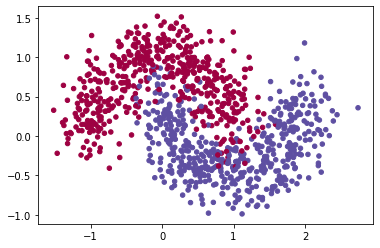

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y, s=20, cmap=plt.cm.Spectral);

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.60)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(600, 2)
(600,)
(400, 2)
(400,)


In [ ]:
modelo_kNN = KNeighborsClassifier(n_neighbors=3)

modelo_kNN.fit(X_train, Y_train)

print(modelo_kNN.score(X_train, Y_train))
print(modelo_kNN.score(X_test, Y_test))

0.9566666666666667
0.9375


###El número de vecinos más cercanos es un hiperparámetro que debe determinarse. En particular para un problema de clasificación binaria es recomendable usar un número impar de vecinos, de lo contrario estará decidiendo de manera aleatoria cuando haya empates. 

In [ ]:
for k in range(1,16):
  modelo_kNN = KNeighborsClassifier(n_neighbors=k)
  modelo_kNN.fit(X_train, Y_train)

  trs = modelo_kNN.score(X_train, Y_train)
  tes = modelo_kNN.score(X_test, Y_test)

  print('k=%d\tTrain: %.4f\tTest: %.4f' % (k, trs, tes))

k=1	Train: 1.0000	Test: 0.9375
k=2	Train: 0.9600	Test: 0.9375
k=3	Train: 0.9567	Test: 0.9375
k=4	Train: 0.9567	Test: 0.9525
k=5	Train: 0.9550	Test: 0.9475
k=6	Train: 0.9567	Test: 0.9575
k=7	Train: 0.9533	Test: 0.9525
k=8	Train: 0.9550	Test: 0.9550
k=9	Train: 0.9500	Test: 0.9575
k=10	Train: 0.9500	Test: 0.9575
k=11	Train: 0.9450	Test: 0.9550
k=12	Train: 0.9467	Test: 0.9550
k=13	Train: 0.9467	Test: 0.9575
k=14	Train: 0.9483	Test: 0.9500
k=15	Train: 0.9450	Test: 0.9525


###**Grid Search**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Podemos igualmente usar la técnica de búsqueda de malla para encontrar los mejores hiperparámetros: GridSearchCV.


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dicc_grid = {'n_neighbors':[1,3,5,7,9,11], 
              'weights':['uniform', 'distance'],  
              'metric':['euclidean', 'manhattan']}

kNN = KNeighborsClassifier()

modelo_kNN = GridSearchCV(kNN, param_grid=dicc_grid, cv=3)

modelo_kNN.fit(X_train,Y_train)

print("Los mejores parametros son %s con un score de %0.2f"
      % (modelo_kNN.best_params_, modelo_kNN.best_score_))

Los mejores parametros son {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'} con un score de 0.95


Debemos verificar que estos mejores parámetros no estén sobreentrenados, de lo contrario, realizar ajustes:

In [ ]:
kNN2 = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')

kNN2.fit(X_train, Y_train)

print(modelo_kNN.score(X_train, Y_train))
print(modelo_kNN.score(X_test, Y_test))

0.955
0.9475


###**Randomized Grid Search**

Igualmente se puede utilizar la técnica de búsqueda aleatorizada de malla, en la cual de manera aleatoria se selecciona una catidad predeterminada de todos las combinaciones posibles. Esto permite acelerar el proceso de búsqueda cuando la cantidad de opciones es muy grande: RandomizedSearchCV.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
dicc_grid = {'n_neighbors':[1,3,5,7,9,11,13,15,17], 
             'weights':['uniform', 'distance'],  
             'metric':['euclidean', 'manhattan'],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
             }

kNN = KNeighborsClassifier()

modelo_kNN = RandomizedSearchCV(kNN, 
                                param_distributions= dicc_grid,    # en este ejemplo tenemos 9x2x2x4=144 combinaciones posibles.
                                cv=5,         # Cross-Validation 
                                n_iter= 20     # n_iter=total de valores que se seleccionarán del grid.
                                ) 

modelo_kNN.fit(X_train,Y_train)

print("Los mejores parametros son %s \ncon un score de %0.2f"
      % (modelo_kNN.best_params_, modelo_kNN.best_score_))

Los mejores parametros son {'weights': 'distance', 'n_neighbors': 11, 'metric': 'euclidean', 'algorithm': 'brute'} 
con un score de 0.94


In [ ]:
kNN2 = KNeighborsClassifier(n_neighbors=11, metric='euclidean', weights='distance', algorithm='brute')

kNN2.fit(X_train, Y_train)

print(modelo_kNN.score(X_train, Y_train))
print(modelo_kNN.score(X_test, Y_test))

1.0
0.955
